# Textmining

---

Group name: Gruppe G (Thomas Wolpert, Sven Ritzmann)

---


### Import libraries & ignore warnings

In [34]:
import pandas as pd

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import numpy as np

from collections import Counter

import altair as alt

In [35]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

### Data import

In [36]:
df = pd.read_csv('../data/raw/webscraping.csv')

df

,author,published,title,text
0,Ramin Skibba,"Nov 16, 2022 2:16 AM",NASA’s Huge SLS Rocket Finally Launches the Ar...,"The 212-foot rocket, including an orange core ..."


### Data corrections

In [37]:
df['text'] = df['text'].astype(str).str.lower()
df['title'] = df['title'].str.lower()

df

,author,published,title,text
0,Ramin Skibba,"Nov 16, 2022 2:16 AM",nasa’s huge sls rocket finally launches the ar...,"the 212-foot rocket, including an orange core ..."


#### Why not transform published?

The value of the information of the date and time of publication is fairly low because only a single article is considered, so no analytics can be performed with this data in relation to the date. The effort to effectively transform the data variably into datetime format is therefore not in relation to the informational gain. A manual transformation would be possible, however would also yield little benefit. Leaving the date and time as-is is therefore viable in this case, as it purely serves as information for human readers.

## Text mining data preparation

In [38]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)

In [39]:
df.head()

,author,published,title,text,text_token
0,Ramin Skibba,"Nov 16, 2022 2:16 AM",nasa’s huge sls rocket finally launches the ar...,"the 212-foot rocket, including an orange core ...","[the, 212, foot, rocket, including, an, orange..."


### Remove stopwords

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stopwords = nltk.corpus.stopwords.words('english')

In [42]:
# filter out stopwords

df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [43]:
# remove infrequent words

df['text_si'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

### Lemmatization

In [44]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [45]:
wordnet_lem = WordNetLemmatizer()

In [46]:
# lemmatize

df['text_sil'] = df['text_si'].apply(wordnet_lem.lemmatize)

In [47]:
# we check wether there are any differences in the two columns
check_difference = (df['text_sil'] == df['text_si'])

# sum all True and False values
check_difference.value_counts()

# no difference, in combination with 'all_words' result seen below, it is clear that lemmatization isn't working correctly.

True    1
dtype: int64

## Data visualisation

### Word cloud

In [48]:
all_words = ' '.join([i for i in df['text_sil']])

In [49]:
all_words

'212 foot rocket including orange core stage two white solid rocket boosters rested upon ground structure called mobile launcher earlier tests boosters ignited rocket lifted explosion flames quickly cleared launch tower began ascent atmosphere ombre orange streak blazing behind liftoff artemis proclaimed derrol nail nasa livestream commentator rise together back moon beyond two minute mark sls boosters finished burning propellant fell away eight minutes launch core stage rocket used fuel separated left uncrewed orion capsule still attached upper stage rocket service module provided european space agency supplies spacecraft main propulsion power orion continued 000 miles per hour minutes later deployed solar arrays mission goes according plan two hours capsule separate sls upper stage drifts away upper stage disperse batches small spacecraft known cubesats sending conduct mini missions around moon mars near earth asteroid meanwhile orion fly taking days reach moon spend couple weeks cal

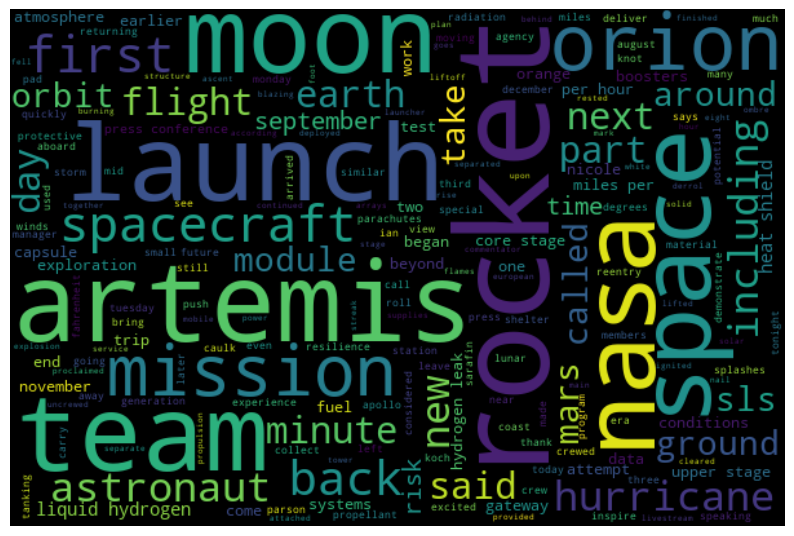

In [50]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

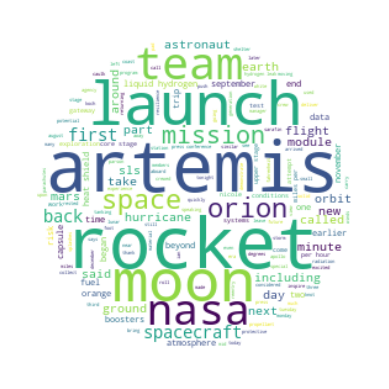

In [51]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
words_tokens = nltk.word_tokenize(all_words)

In [54]:
fd = FreqDist(words_tokens)

In [55]:
words_tokens

['212',
 'foot',
 'rocket',
 'including',
 'orange',
 'core',
 'stage',
 'two',
 'white',
 'solid',
 'rocket',
 'boosters',
 'rested',
 'upon',
 'ground',
 'structure',
 'called',
 'mobile',
 'launcher',
 'earlier',
 'tests',
 'boosters',
 'ignited',
 'rocket',
 'lifted',
 'explosion',
 'flames',
 'quickly',
 'cleared',
 'launch',
 'tower',
 'began',
 'ascent',
 'atmosphere',
 'ombre',
 'orange',
 'streak',
 'blazing',
 'behind',
 'liftoff',
 'artemis',
 'proclaimed',
 'derrol',
 'nail',
 'nasa',
 'livestream',
 'commentator',
 'rise',
 'together',
 'back',
 'moon',
 'beyond',
 'two',
 'minute',
 'mark',
 'sls',
 'boosters',
 'finished',
 'burning',
 'propellant',
 'fell',
 'away',
 'eight',
 'minutes',
 'launch',
 'core',
 'stage',
 'rocket',
 'used',
 'fuel',
 'separated',
 'left',
 'uncrewed',
 'orion',
 'capsule',
 'still',
 'attached',
 'upper',
 'stage',
 'rocket',
 'service',
 'module',
 'provided',
 'european',
 'space',
 'agency',
 'supplies',
 'spacecraft',
 'main',
 'propuls

In [56]:
fd

FreqDist({'rocket': 16, 'artemis': 15, 'launch': 14, 'moon': 14, 'team': 14, 'nasa': 13, 'space': 12, 'orion': 11, 'spacecraft': 9, 'mission': 9, ...})

### Most common words

In [57]:
Counter(fd).most_common(3)

[('rocket', 16), ('artemis', 15), ('launch', 14)]

In [58]:
fd.tabulate(3)

 rocket artemis  launch 
     16      15      14 


### Plot common words

In [59]:
top_10 = fd.most_common(10)

top_10

[('rocket', 16),
 ('artemis', 15),
 ('launch', 14),
 ('moon', 14),
 ('team', 14),
 ('nasa', 13),
 ('space', 12),
 ('orion', 11),
 ('spacecraft', 9),
 ('mission', 9)]

In [60]:
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
artemis,15
launch,14
mission,9
moon,14
nasa,13
orion,11
rocket,16
space,12
spacecraft,9
team,14


In [61]:
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,artemis,15
1,launch,14
2,mission,9
3,moon,14
4,nasa,13
5,orion,11
6,rocket,16
7,space,12
8,spacecraft,9
9,team,14


In [62]:
alt.renderers.enable('default')

# necessary, as following chart wouldn't show otherwise

RendererRegistry.enable('default')

In [63]:
alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

In [64]:
fd["orbit"]

4

## Sentiment analysis

### VADER lexicon

In [65]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment Intensity Analyzer

In [66]:
analyzer = SentimentIntensityAnalyzer()

### Polarity score

In [67]:
df['polarity'] = df['text_sil'].apply(lambda x: analyzer.polarity_scores(x))

df

,author,published,title,text,text_token,text_token_s,text_si,text_sil,polarity
0,Ramin Skibba,"Nov 16, 2022 2:16 AM",nasa’s huge sls rocket finally launches the ar...,"the 212-foot rocket, including an orange core ...","[the, 212, foot, rocket, including, an, orange...","[212, foot, rocket, including, orange, core, s...",212 foot rocket including orange core stage tw...,212 foot rocket including orange core stage tw...,"{'neg': 0.032, 'neu': 0.859, 'pos': 0.11, 'com..."


### Transform data

In [68]:
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)

df

,author,published,title,text,text_token,text_token_s,text_si,text_sil,neg,neu,pos,compound
0,Ramin Skibba,"Nov 16, 2022 2:16 AM",nasa’s huge sls rocket finally launches the ar...,"the 212-foot rocket, including an orange core ...","[the, 212, foot, rocket, including, an, orange...","[212, foot, rocket, including, orange, core, s...",212 foot rocket including orange core stage tw...,212 foot rocket including orange core stage tw...,0.032,0.859,0.11,0.9972


In [69]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x==0 else 'negative')

In [70]:
df

,author,published,title,text,text_token,text_token_s,text_si,text_sil,neg,neu,pos,compound,sentiment
0,Ramin Skibba,"Nov 16, 2022 2:16 AM",nasa’s huge sls rocket finally launches the ar...,"the 212-foot rocket, including an orange core ...","[the, 212, foot, rocket, including, an, orange...","[212, foot, rocket, including, orange, core, s...",212 foot rocket including orange core stage tw...,212 foot rocket including orange core stage tw...,0.032,0.859,0.11,0.9972,positive


### Max and min sentiment

Note: Finding maximum and minimum sentiment is technically redundant, as only one text is analyzed, which therefore holds both maximum and minimum sentiment values.

In [71]:
df[['text', 'compound', 'neg', 'neu', 'pos', 'sentiment']].loc[df['compound'].idxmax()]

text         the 212-foot rocket, including an orange core ...
compound                                                0.9972
neg                                                      0.032
neu                                                      0.859
pos                                                       0.11
sentiment                                             positive
Name: 0, dtype: object

In [72]:
df[['text', 'compound', 'neg', 'neu', 'pos', 'sentiment']].loc[df['compound'].idxmin()]

text         the 212-foot rocket, including an orange core ...
compound                                                0.9972
neg                                                      0.032
neu                                                      0.859
pos                                                       0.11
sentiment                                             positive
Name: 0, dtype: object

### Additional visualization

Note: Following visualization is also redundant, as only a single text is considered

In [73]:
domain = ['neutral', 'positive', 'negative']
range_=['#b2d8d8',"#008080", '#db3d13']


alt.Chart(df).mark_bar().encode(
    x=alt.X('count()', title=None),
    y=alt.Y('sentiment', sort="-x"),
    color= alt.Color('sentiment', legend=None, scale=alt.Scale(domain=domain, range=range_))
).properties(
    title="Sentiment analysis",
    width=400,
    height=150,
)

alt.Chart(...)

Note: Visualization for Date is skipped, for reasons given above (informational gain not in relation to variable transformation of date).

Note: Following visualization appears empty because the visualization in the boxplot requires multiple entries to correctly show in the chart.

In [74]:
alt.Chart(df).mark_boxplot().encode(
    x=alt.X('sentiment'),
    y=alt.Y('compound'),
    color=alt.Color('sentiment', scale=alt.Scale(domain=domain, range=range_))
).properties(
    width=200,
    height=200
)

alt.Chart(...)